Importing dependencies

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection and preprocessing

In [2]:
# Dataset import
Titanic_dataset = pd.read_csv('/content/train.csv')

In [3]:
# First five rows of dataset
Titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# No of values in dataset
Titanic_dataset.shape

(891, 12)

In [5]:
# No of empty entries
Titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Additional information
Titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data cleaning - Missing values

In [13]:
# Drop Cabin columns
Titanic_dataset = Titanic_dataset.drop('Cabin', axis=1)
print(Titanic_dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [14]:
# Replace the missing values with mean values
Titanic_dataset['Age'].fillna(Titanic_dataset['Age'].mean(),inplace=True)

In [20]:
# Finding value count in Embarked column
print(Titanic_dataset['Embarked'].mode())

0    S
dtype: object


In [22]:
# Alternative method
Titanic_dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
# Replace missing value with frequently occouring value 'S'
Titanic_dataset['Embarked'].fillna(Titanic_dataset['Embarked'].mode()[0], inplace=True)

In [24]:
Titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [25]:
# Statistical measures
Titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# Finding number of people who didnt survive
Titanic_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

In [27]:
sns.set()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

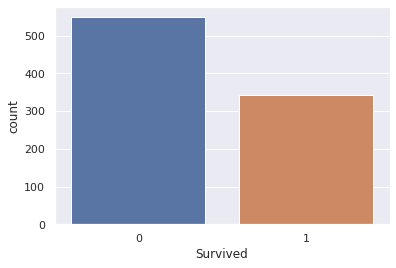

In [29]:
# Count plot for survived values
sns.countplot('Survived', data=Titanic_dataset)

male      577
female    314
Name: Sex, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

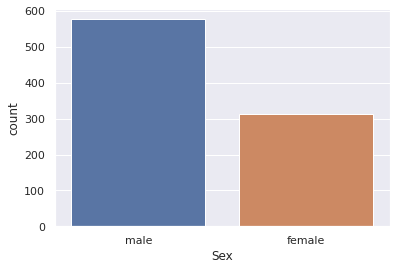

In [33]:
# Count plot based on gender
print(Titanic_dataset['Sex'].value_counts())
sns.countplot('Sex', data=Titanic_dataset)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

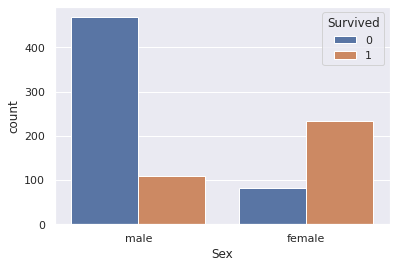

In [34]:
# No of survivors based on gender
sns.countplot('Sex', hue='Survived', data=Titanic_dataset)

Encoding Categorical column to numerical values

In [37]:
# Dropping Name columns
Titanic_dataset = Titanic_dataset.drop('Name', axis=1)
print(Titanic_dataset)

     PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch  \
0              1         0       3    male  22.000000      1      0   
1              2         1       1  female  38.000000      1      0   
2              3         1       3  female  26.000000      0      0   
3              4         1       1  female  35.000000      1      0   
4              5         0       3    male  35.000000      0      0   
..           ...       ...     ...     ...        ...    ...    ...   
886          887         0       2    male  27.000000      0      0   
887          888         1       1  female  19.000000      0      0   
888          889         0       3  female  29.699118      1      2   
889          890         1       1    male  26.000000      0      0   
890          891         0       3    male  32.000000      0      0   

               Ticket     Fare Embarked  
0           A/5 21171   7.2500        S  
1            PC 17599  71.2833        C  
2    STON/O2. 3101282

In [43]:
# Converting to numerical values
Titanic_dataset.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [44]:
Titanic_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0


Seperating Features and Target

In [45]:
# Creating Label
X = Titanic_dataset.drop(columns=['Survived','PassengerId','Ticket'],axis=1)
Y = Titanic_dataset['Survived']

In [47]:
print(X.head())
print(Y)

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting data into Training and Testing

In [48]:
# Splitting using Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [49]:
# No of values in split data
X_train.shape, X_test.shape, X.shape

((712, 7), (179, 7), (891, 7))

Model Training and Evaluation

In [50]:
model = LogisticRegression()

In [51]:
# Training the data
Training_data = model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Accuracy of Training data
Training_data_prediction = model.predict(X_train)
print(Training_data_prediction)

training_data_accuracy = accuracy_score(Y_train, Training_data_prediction)
print('Training data accuracy is : ', training_data_accuracy)

[0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1
 1 0 1 0 1 0 0 1 0 1 0 1 

In [57]:
# Accuracy of test data
Test_data_prediction = model.predict(X_test)
print(Test_data_prediction)

test_data_accuracy = accuracy_score(Y_test, Test_data_prediction)
print('Test data accuracy is : ', test_data_accuracy)


[0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Test data accuracy is :  0.7932960893854749
